## Set up

Use conda to install seaborn by running in a terminal:

`conda install seaborn`

In [1]:
# imports a library 'pandas', names it as 'pd'

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# enables inline plots, without it plots don't show up in the notebook
%matplotlib inline

#### What problem does pandas solve?

Python has long been great for data munging and preparation, but less so for data analysis and modeling. pandas helps fill this gap, enabling you to carry out your entire data analysis workflow in Python without having to switch to a more domain specific language like R.

Combined with the excellent IPython toolkit and other libraries, the environment for doing data analysis in Python excels in performance, productivity, and the ability to collaborate.

***`pandas`*** does not implement significant modeling functionality outside of linear and panel regression; for this, look to statsmodels and scikit-learn. More work is still needed to make Python a first class statistical modeling environment, but we are well on our way toward that goal.

http://pandas.pydata.org/

In [2]:
# various options in pandas

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.precision', 3)

## Load a data set

"Census Income" dataset

http://archive.ics.uci.edu/ml/

In [3]:
# download the data and name the columns
cols = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
        'marital_status', 'occupation', 'relationship', 'ethnicity',
        'gender', 'capital_gain', 'capital_loss', 'hours_per_week',
        'country_of_origin', 'income']

df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
                       names = cols)

**Q: What's happening in the above cell?**

pandas can load a lot more than csvs, this tutorial shows how pandas can read excel, sql,
and even copy and paste...

http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/

## View

In [4]:
# we can see there are no null values
# columns with numerical values are type int64, no need to set data type

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age                  32561 non-null int64
workclass            32561 non-null object
fnlwgt               32561 non-null int64
education            32561 non-null object
education_num        32561 non-null int64
marital_status       32561 non-null object
occupation           32561 non-null object
relationship         32561 non-null object
ethnicity            32561 non-null object
gender               32561 non-null object
capital_gain         32561 non-null int64
capital_loss         32561 non-null int64
hours_per_week       32561 non-null int64
country_of_origin    32561 non-null object
income               32561 non-null object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [5]:
# to view the first 5 or specify with ex: .head(10)
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,country_of_origin,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
# there's a space before each string in this data
df.education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [7]:
# looks like it's in every object column
df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay', ' Never-worked'], dtype=object)

## Strip spaces in columns

In [8]:
# loop through each column and strip all the spaces

for col in df:
    if df[col].dtype == 'O':
        df[col] = df[col].map(lambda x: x.strip(' '))

In [9]:
# Here's a break down of what that for loop is doing

In [10]:
# loops through df and gets the column names
for col in df:
    print col

age
workclass
fnlwgt
education
education_num
marital_status
occupation
relationship
ethnicity
gender
capital_gain
capital_loss
hours_per_week
country_of_origin
income


In [11]:
# gets the column type
df.education.dtype

dtype('O')

In [12]:
# if True then applys the map function
df.education.dtype == object

True

In [13]:
# strip function
x = ' string'
x.strip(' ')

'string'

In [14]:
# lambda creates a 'throw away' or 'anonymous' function
strip_string = lambda x: x.strip(' ')
strip_string(' string')

'string'

In [15]:
# same as this
def strip_string2(x):
    x = x.strip(' ')
    return x

In [16]:
strip_string2(' string')

'string'

In [17]:
# map applies the function to each item in the data frame column (which is a Series) so

df[col].map(lambda x: x.strip(' '))

# does the same thing as

df['workclass'].map(strip_string2)

# but in the first case we don't have to define and name a function

0               State-gov
1        Self-emp-not-inc
2                 Private
3                 Private
4                 Private
5                 Private
6                 Private
7        Self-emp-not-inc
8                 Private
9                 Private
               ...       
32551             Private
32552             Private
32553             Private
32554             Private
32555             Private
32556             Private
32557             Private
32558             Private
32559             Private
32560        Self-emp-inc
Name: workclass, dtype: object

for more info on lambda and map

http://www.python-course.eu/lambda.php

## Descriptive 

In [18]:
df.education.value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [19]:
df.hours_per_week.mean()

40.437455852092995

In [20]:
df[['age', 'capital_gain', 'capital_loss', 'hours_per_week']].describe()

,age,capital_gain,capital_loss,hours_per_week
count,32561.000,32561.000,32561.000,32561.000
mean,38.582,1077.649,87.304,40.437
std,13.640,7385.292,402.960,12.347
min,17.000,0.000,0.000,1.000
25%,28.000,0.000,0.000,40.000
50%,37.000,0.000,0.000,40.000
75%,48.000,0.000,0.000,45.000
max,90.000,99999.000,4356.000,99.000


## Find nulls

In [21]:
# as we saw with df.info() there are no nulls... 
# but if there were this would find the rows where age is null
df[df.age.isnull()]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,country_of_origin,income


In [22]:
# you could drop all those rows with
df_no_nulls = df[df.age.notnull()]

## Fill nulls

In [23]:
null_df = pd.DataFrame([1,2,4,np.nan], columns = ['column1'])

In [24]:
null_df

,column1
0,1
1,2
2,4
3,NaN


In [25]:
# you can also fill nulls with a value or string
null_df.column1.fillna(1000)

0       1
1       2
2       4
3    1000
Name: column1, dtype: float64

In [26]:
null_df.column1.fillna(null_df.column1.median())

0    1
1    2
2    4
3    2
Name: column1, dtype: float64

In [27]:
null_df.column1.fillna('string')

0         1
1         2
2         4
3    string
Name: column1, dtype: object

## Selecting rows and columns 

In [28]:
# select a row
df.iloc[0]

age                             39
workclass                State-gov
fnlwgt                       77516
education                Bachelors
education_num                   13
marital_status       Never-married
occupation            Adm-clerical
relationship         Not-in-family
ethnicity                    White
gender                        Male
capital_gain                  2174
capital_loss                     0
hours_per_week                  40
country_of_origin    United-States
income                       <=50K
Name: 0, dtype: object

In [29]:
# select a range of rows
df.iloc[10:15]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,country_of_origin,income
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
12,23,Private,122272,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K
13,32,Private,205019,Assoc-acdm,12,Never-married,Sales,Not-in-family,Black,Male,0,0,50,United-States,<=50K
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K


In [30]:
# last 2 rows
df.iloc[-2:]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,country_of_origin,income
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [31]:
# selecting every other row in columns 3-5
df.iloc[::2, 2:5].head()

,fnlwgt,education,education_num
0,77516,Bachelors,13
2,215646,HS-grad,9
4,338409,Bachelors,13
6,160187,9th,5
8,45781,Masters,14


In [32]:
df.loc[0:2, ['age', 'relationship ']]

,age,relationship
0,39,NaN
1,50,NaN
2,38,NaN


## Differences between .loc, .iloc, and .ix

http://pandas.pydata.org/pandas-docs/stable/indexing.html

by label

.loc[]

by integer position

.iloc[]

for both

.ix[]

In [33]:
# pd.DataFrame let's you turn series, arrays, lists, and more into data frame structures

df_index = pd.DataFrame([[1,2,3,4],[2,4,6,8],[3,5,7,9]], [11,13,12], columns = ['A', 'C', 'D', 'B'])

In [34]:
df_index

,A,C,D,B
11,1,2,3,4
13,2,4,6,8
12,3,5,7,9


In [35]:
# iloc indexes by postion, not by the labels in the index
df_index.iloc[0:1]

,A,C,D,B
11,1,2,3,4


In [36]:
# with loc both the start and the stop are included
df_index.loc[11:12]

,A,C,D,B
11,1,2,3,4
13,2,4,6,8
12,3,5,7,9


In [37]:
# select columns by position
df_index.iloc[:,0:1]

,A
11,1
13,2
12,3


In [38]:
# or by label
df_index.loc[:,'A':'D']

,A,C,D
11,1,2,3
13,2,4,6
12,3,5,7


In [39]:
# ix: primarily label based, but will fall back to integer positional access
df_index.ix[:,'A':'C']

,A,C
11,1,2
13,2,4
12,3,5


In [40]:
# ix: primarily label based, but will fall back to integer positional access
df_index.ix[:,0:2]

,A,C
11,1,2
13,2,4
12,3,5


## Rename columns

In [41]:
df.columns

Index([u'age', u'workclass', u'fnlwgt', u'education', u'education_num',
       u'marital_status', u'occupation', u'relationship', u'ethnicity',
       u'gender', u'capital_gain', u'capital_loss', u'hours_per_week',
       u'country_of_origin', u'income'],
      dtype='object')

In [42]:
# replace a column name
df.rename(columns = {'country_of_origin' : 'native_country'}, inplace = True)
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Boolean

In [43]:
df.native_country.unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico', 'South',
       'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran',
       'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala', 'China',
       'Japan', 'Yugoslavia', 'Peru', 'Outlying-US(Guam-USVI-etc)',
       'Scotland', 'Trinadad&Tobago', 'Greece', 'Nicaragua', 'Vietnam',
       'Hong', 'Ireland', 'Hungary', 'Holand-Netherlands'], dtype=object)

In [44]:
df[df.native_country == 'United-States'].head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [45]:
df[(df.native_country != 'United-States') & (df.education_num > 9)].head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,native_country,income
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K


In [46]:
df[(df.native_country != 'United-States') & (df.education_num > 9)].income.value_counts()

<=50K    1137
>50K      536
Name: income, dtype: int64

## Groupby

In [47]:
# How to groupby column and apply a function like sum, count, or mean
df.groupby(['relationship']).mean()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
relationship,,,,,,
Husband,43.819,187074.863,10.326,1795.062,124.161,44.120
Not-in-family,38.346,191131.795,10.316,743.327,75.391,40.596
Other-relative,33.164,205059.822,8.787,279.595,51.332,37.006
Own-child,24.828,193175.409,9.486,155.655,39.512,33.269
Unmarried,40.294,191128.406,9.642,455.031,41.465,39.103
Wife,39.846,181849.508,10.463,1659.791,118.006,36.862


In [48]:
# To groupby multiple columns with multiple functions attached
df.groupby(['income', 'native_country']).age.agg(['count', 'mean'])
# grouped in order of which column is listed first

count    mean
income native_country                   
<=50K  ?                     437  36.854
       Cambodia               12  35.667
       Canada                 82  41.012
       China                  55  41.800
       Columbia               57  39.228
       Cuba                   70  47.286
       Dominican-Republic     68  37.941
       Ecuador                24  34.833
       El-Salvador            97  32.649
       England                60  38.967
...                          ...     ...
>50K   Portugal                4  40.000
       Puerto-Rico            12  46.500
       Scotland                3  52.667
       South                  16  44.875
       Taiwan                 20  40.800
       Thailand                3  32.667
       Trinadad&Tobago         2  42.500
       United-States        7171  44.297
       Vietnam                 5  35.400
       Yugoslavia              6  40.167

[82 rows x 2 columns]

In [49]:
# combine groupby with boolean

df[df.native_country != 'United-States'].groupby(['education']).hours_per_week.mean()

education
10th            38.424
11th            36.333
12th            40.235
1st-4th         40.270
5th-6th         39.686
7th-8th         40.408
9th             38.076
Assoc-acdm      38.741
Assoc-voc       41.301
Bachelors       41.844
Doctorate       45.294
HS-grad         40.324
Masters         41.245
Preschool       40.912
Prof-school     47.027
Some-college    38.735
Name: hours_per_week, dtype: float64

## plotting with pandas

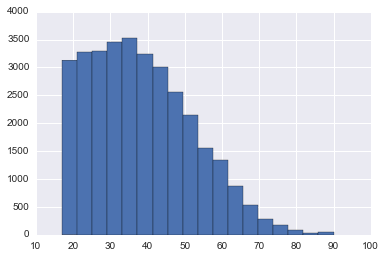

In [50]:
df.age.hist(bins = 18);

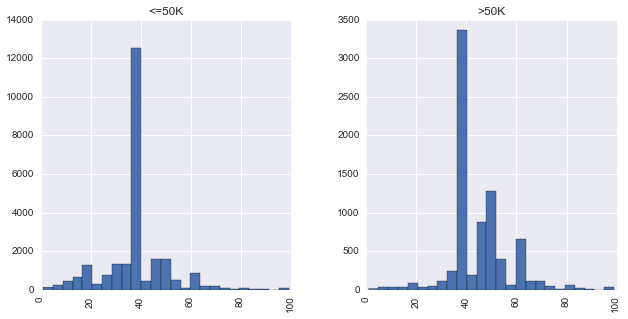

In [51]:
# split the histograms by another column (with relatively few unique values)
df.hours_per_week.hist(by = df.income, bins = 25, figsize = (10,5));

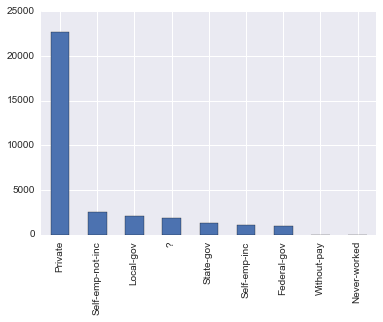

In [52]:
# use value_counts() and a bar plot
df['workclass'].value_counts().plot(kind = 'bar')

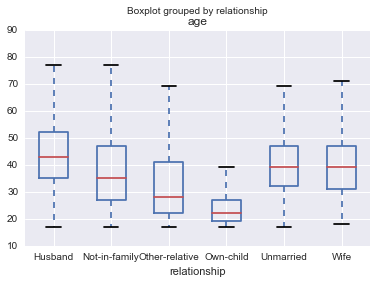

In [53]:
df.boxplot(['age'], by = 'relationship');

/Users/pburkard88/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


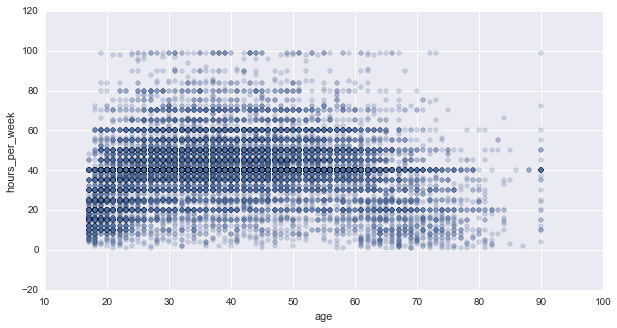

In [54]:
df.plot(kind='scatter',
        x = 'age',
        y ='hours_per_week',
        alpha = .25,
        figsize = (10,5))

## Practice Exercises

In [ ]:
# how many males and females are in this data set

In [56]:
df.gender.value_counts()

Male      21790
Female    10771
Name: gender, dtype: int64

In [ ]:
# plot the total number of people in each occupation

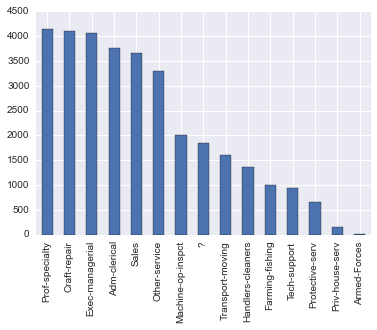

In [57]:
df.occupation.value_counts().plot(kind='bar')

In [ ]:
# what is the lowest average age of an occupation

In [62]:
df.groupby("occupation").age.mean().sort_values()

occupation
Armed-Forces         30.222
Handlers-cleaners    32.166
Other-service        34.950
Adm-clerical         36.964
Tech-support         37.023
Sales                37.354
Machine-op-inspct    37.715
Protective-serv      38.954
Craft-repair         39.031
Transport-moving     40.198
Prof-specialty       40.518
?                    40.883
Farming-fishing      41.211
Priv-house-serv      41.725
Exec-managerial      42.169
Name: age, dtype: float64

In [ ]:
# create a boxplot of hours per week by education level

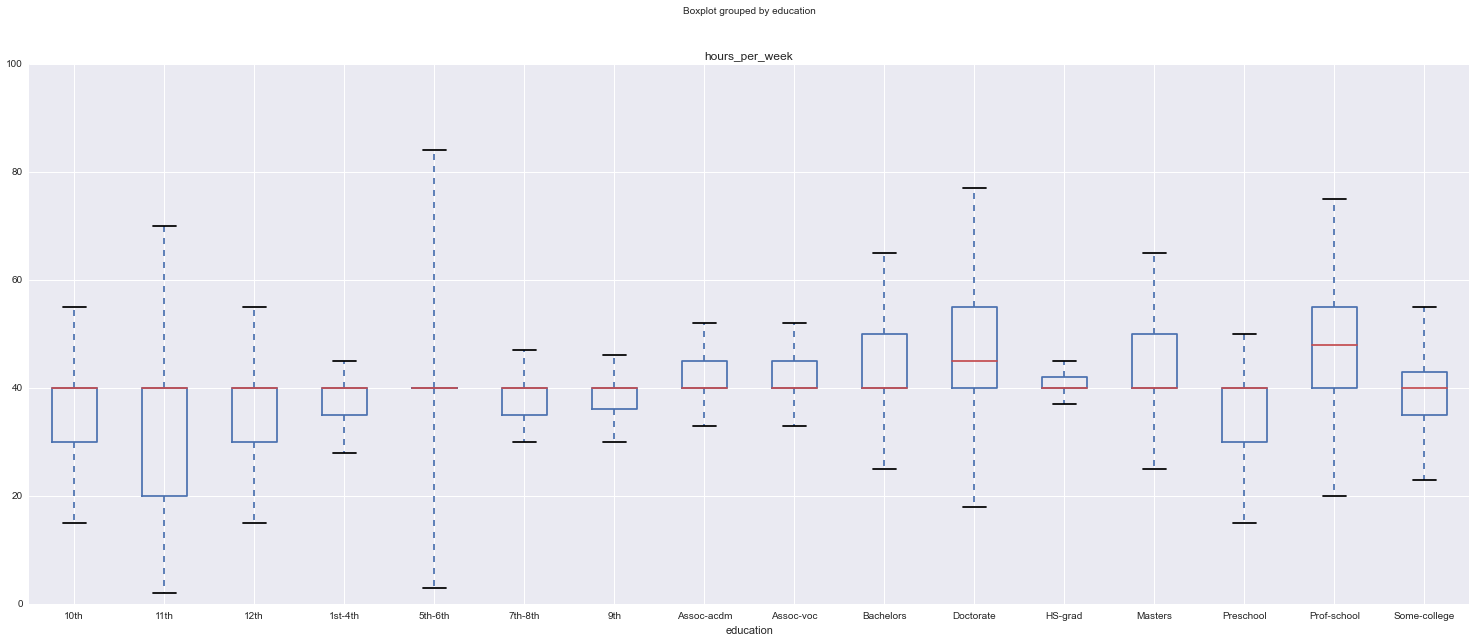

In [67]:
df.boxplot(['hours_per_week'], by='education', figsize=(25,10))

In [ ]:
# create a new column for income where >50K = 1 and <=50K = 0

# hint... http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.replace.html

In [73]:
df['high_income'] = df.income.replace(['>50K', '<=50K'], [1,0])
print df.high_income

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        1
8        1
9        1
        ..
32551    0
32552    0
32553    0
32554    1
32555    0
32556    0
32557    1
32558    0
32559    0
32560    1
Name: high_income, dtype: int64


In [ ]:
# find which "native_country" has the highest percent of people earning >50K
# The easiest way to do this is to jus calculate the MEAN of your new binary income column created above
# since this will in fact be the percentage:

In [91]:
df.groupby('native_country').high_income.mean().sort_values(ascending=False)

native_country
Iran                          0.419
France                        0.414
India                         0.400
Taiwan                        0.392
Japan                         0.387
Yugoslavia                    0.375
Cambodia                      0.368
Italy                         0.342
England                       0.333
Canada                        0.322
                              ...  
Honduras                      0.077
Vietnam                       0.075
Peru                          0.065
Nicaragua                     0.059
Mexico                        0.051
Guatemala                     0.047
Columbia                      0.034
Dominican-Republic            0.029
Outlying-US(Guam-USVI-etc)    0.000
Holand-Netherlands            0.000
Name: high_income, dtype: float64

In [ ]:
# A more complicated, but instructive way to do this is to divide the sum of that column by the total count for that
# column for each group, then use the apply() function row-wise to get our percentages.  Here's an example:

In [93]:
x = df.groupby('native_country').high_income.agg(['sum', 'count'])
y = x.apply(lambda x: x[0]*1.0/x[1], axis=1).sort_values(ascending=False)
y

native_country
Iran                          0.419
France                        0.414
India                         0.400
Taiwan                        0.392
Japan                         0.387
Yugoslavia                    0.375
Cambodia                      0.368
Italy                         0.342
England                       0.333
Canada                        0.322
                              ...  
Honduras                      0.077
Vietnam                       0.075
Peru                          0.065
Nicaragua                     0.059
Mexico                        0.051
Guatemala                     0.047
Columbia                      0.034
Dominican-Republic            0.029
Outlying-US(Guam-USVI-etc)    0.000
Holand-Netherlands            0.000
dtype: float64

What's happening above with the apply function is you've specified it to operate row-wise by setting axis=1 (this means it will do the function you specify to every single row and then spit out the result).  Here the lambda function given is to divide the first column (the sum) by the 2nd column (the count) which yields the desired percentage.  Apply is similar to map, see the Pandas documentation or [here](http://stackoverflow.com/questions/19798153/difference-between-map-applymap-and-apply-methods-in-pandas) for an explanation of the differences between them and a 3rd, apply_map.

In [ ]:
# visualize what percent of people earn over 50K by education level

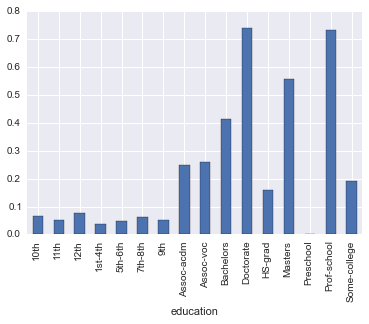

In [94]:
df.groupby('education').high_income.mean().plot(kind='bar')

## Extra practice

In [ ]:
# make a hexbin plot

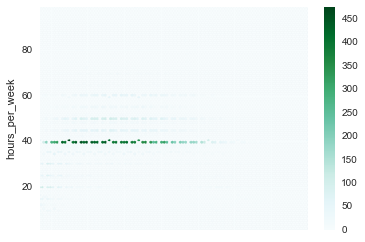

In [103]:
df.plot.hexbin(x='age', y='hours_per_week')

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html

In [ ]:
# check out plotting with Seaborn

http://nbviewer.ipython.org/gist/mwaskom/8224591

http://stanford.edu/~mwaskom/software/seaborn/tutorial/plotting_distributions.html